In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

/home/turbots/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
import numpy as np
import pylab as plt
import glob
import h5py
import os
from pprint import pprint
import scipy.integrate as inte
import scipy.special as special
import scipy.interpolate as interp
import scipy.signal as sig

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import stephane.display.graphes as graphes
import stephane.tools.Smath as smath

import icewave.tools.datafolders as df
#import sympy #symoblic python
import mpmath as math
import cv2
import glob
import csv
import os

import icewave

In [4]:
folder = '/media/turbots/BicWin2024/Share/Data'
os.path.exists(folder)

True

In [66]:
#folder = df.find_path()

date = '0211'
for i in range(5,24):
    print(f'02{i:02d}',df.find_instruments(f'2024_02{i:02d}'))

0205 ['Telephone_Baptiste', 'Marees']
0206 ['GPS', 'Cahier_de_manip', 'tel_bapt', 'Marees', 'Geophones']
0207 ['GPS', 'Marees']
0208 ['GPS', 'Marees', 'Redmi00', 'Telephone_Baptiste', 'Drones']
0209 ['GPS', 'Drones', 'Geophones', 'Telephone_baptiste', 'Marees']
0210 ['Geometry', 'GPS', 'Telephones', 'Best_of', 'drones', 'Geophones', 'Telephone_Baptiste', 'Marees', 'Geophones_tries']
0211 ['Geometry', 'Geophones', 'GPS', 'Photographies', 'Telephones', 'Drones', 'Marees', 'Best_of', 'BoueeVague', 'Cahier de manip', 'Heights', 'CompteRendu', 'Data_Depot']
0212 ['Photos_equipe', 'Marees']
0213 ['Marees']
0214 ['Drones', 'Marees']
0215 ['Marees', 'Drones']
0216 ['Marees', 'Drones']
0217 ['Marees', 'Drones']
0218 ['Drones', 'Marees']
0219 ['Marees', 'Drones']
0220 ['Marees', 'Drones']
0221 ['GPS', 'Drones', 'Cahier_de_manip', 'Geophones', 'Epaisseur', 'Telephones', 'Geometry', 'Marees']
0222 []
0223 []


In [6]:
i = 11
datafolder = df.date_folder(f'2024_02{i:02d}')+'Telephones/'
print(datafolder)
print(glob.glob(datafolder))
#print(datafolder)
folderlist = glob.glob(datafolder+'*Sync*')
print(folderlist)
savefolder = datafolder + 'Resultats/'
print(savefolder)


/media/turbots/BicWin2024/Share/Data/0211/Telephones/
['/media/turbots/BicWin2024/Share/Data/0211/Telephones/']
['/media/turbots/BicWin2024/Share/Data/0211/Telephones/PhyPhox_1707668149_Syncrho1', '/media/turbots/BicWin2024/Share/Data/0211/Telephones/PhyPhox_1707668636_Syncrho2']
/media/turbots/BicWin2024/Share/Data/0211/Telephones/Resultats/


In [7]:
phonelist = [8,11,12,13,16,21]

import zipfile


for folder in folderlist:
    for phone in phonelist:

        filelist = glob.glob(folder+f"/*{100+phone}.zip")
        print(filelist)

        data = {}
        for filename in filelist:
            with zipfile.ZipFile(filename,"r") as zip_ref:
                foldersave = filename.split('.')[0]
                #zip_ref.extractall(foldersave)

['/media/turbots/BicWin2024/Share/Data/0211/Telephones/PhyPhox_1707668149_Syncrho1/test_192_168_0_108.zip']
['/media/turbots/BicWin2024/Share/Data/0211/Telephones/PhyPhox_1707668149_Syncrho1/test_192_168_0_111.zip']
['/media/turbots/BicWin2024/Share/Data/0211/Telephones/PhyPhox_1707668149_Syncrho1/test_192_168_0_112.zip']
['/media/turbots/BicWin2024/Share/Data/0211/Telephones/PhyPhox_1707668149_Syncrho1/test_192_168_0_113.zip']
['/media/turbots/BicWin2024/Share/Data/0211/Telephones/PhyPhox_1707668149_Syncrho1/test_192_168_0_116.zip']
['/media/turbots/BicWin2024/Share/Data/0211/Telephones/PhyPhox_1707668149_Syncrho1/test_192_168_0_121.zip']
['/media/turbots/BicWin2024/Share/Data/0211/Telephones/PhyPhox_1707668636_Syncrho2/test_192_168_0_108.zip']
['/media/turbots/BicWin2024/Share/Data/0211/Telephones/PhyPhox_1707668636_Syncrho2/test_192_168_0_111.zip']
['/media/turbots/BicWin2024/Share/Data/0211/Telephones/PhyPhox_1707668636_Syncrho2/test_192_168_0_112.zip']
['/media/turbots/BicWin2024/

In [8]:
folder = folderlist[0]
print(folder)

/media/turbots/BicWin2024/Share/Data/0211/Telephones/PhyPhox_1707668149_Syncrho1


In [9]:
folderlist = glob.glob(folder+'/*')[-6:]
pprint(folderlist)

['/media/turbots/BicWin2024/Share/Data/0211/Telephones/PhyPhox_1707668149_Syncrho1/0000_11_192_168_0_111',
 '/media/turbots/BicWin2024/Share/Data/0211/Telephones/PhyPhox_1707668149_Syncrho1/0000_12_192_168_0_112',
 '/media/turbots/BicWin2024/Share/Data/0211/Telephones/PhyPhox_1707668149_Syncrho1/0000_13_192_168_0_113',
 '/media/turbots/BicWin2024/Share/Data/0211/Telephones/PhyPhox_1707668149_Syncrho1/0000_16_192_168_0_116',
 '/media/turbots/BicWin2024/Share/Data/0211/Telephones/PhyPhox_1707668149_Syncrho1/0000_21_192_168_0_121',
 '/media/turbots/BicWin2024/Share/Data/0211/Telephones/PhyPhox_1707668149_Syncrho1/0000_08_192_168_0_108']


In [10]:
import icewave.phone.load as load
print(os.path.basename(folderlist[0]))

pprint(folderlist)
data = load.loads(folderlist)

print(data.keys())

0000_11_192_168_0_111
['/media/turbots/BicWin2024/Share/Data/0211/Telephones/PhyPhox_1707668149_Syncrho1/0000_11_192_168_0_111',
 '/media/turbots/BicWin2024/Share/Data/0211/Telephones/PhyPhox_1707668149_Syncrho1/0000_12_192_168_0_112',
 '/media/turbots/BicWin2024/Share/Data/0211/Telephones/PhyPhox_1707668149_Syncrho1/0000_13_192_168_0_113',
 '/media/turbots/BicWin2024/Share/Data/0211/Telephones/PhyPhox_1707668149_Syncrho1/0000_16_192_168_0_116',
 '/media/turbots/BicWin2024/Share/Data/0211/Telephones/PhyPhox_1707668149_Syncrho1/0000_21_192_168_0_121',
 '/media/turbots/BicWin2024/Share/Data/0211/Telephones/PhyPhox_1707668149_Syncrho1/0000_08_192_168_0_108']
Load data for phone 11
['property', 'value'] ['version', '1.1.12']
['property', 'value'] ['build', '1011208']
['property', 'value'] ['fileFormat', '1.16']
['property', 'value'] ['deviceModel', '22011119UY']
['property', 'value'] ['deviceBrand', 'Redmi']
['property', 'value'] ['deviceBoard', 'eos']
['property', 'value'] ['deviceManufac

data cannotbe converted to float
/media/turbots/BicWin2024/Share/Data/0211/Telephones/PhyPhox_1707668149_Syncrho1/0000_21_192_168_0_121/Location.csv
/media/turbots/BicWin2024/Share/Data/0211/Telephones/PhyPhox_1707668149_Syncrho1/0000_21_192_168_0_1
/media/turbots/BicWin2024/Share/Data/0211/Telephones/PhyPhox_1707668149_Syncrho1/0000_21_192_168_0_121/Magnetometer.csv
data cannotbe converted to float
Load data for phone 8
['property', 'value'] ['version', '1.1.12']
['property', 'value'] ['build', '1011208']
['property', 'value'] ['fileFormat', '1.16']
['property', 'value'] ['deviceModel', '22011119UY']
['property', 'value'] ['deviceBrand', 'Redmi']
['property', 'value'] ['deviceBoard', 'eos']
['property', 'value'] ['deviceManufacturer', 'Xiaomi']
['property', 'value'] ['deviceBaseOS', '']
['property', 'value'] ['deviceCodename', 'REL']
['property', 'value'] ['deviceRelease', '11']
['property', 'value'] ['depthFrontSensor', '0']
['property', 'value'] ['depthFrontResolution', 'null']
['pr

/media/turbots/BicWin2024/Share/git/icewave/icewave/phone/load.py:51: UserWarning: loadtxt: input contained no data: "/media/turbots/BicWin2024/Share/Data/0211/Telephones/PhyPhox_1707668149_Syncrho1/0000_11_192_168_0_111/Location.csv"
  data[key]['d'] = np.loadtxt(datafile, delimiter=',',usecols=(0,1,2,3),skiprows=1)
/media/turbots/BicWin2024/Share/git/icewave/icewave/phone/load.py:53: UserWarning: loadtxt: input contained no data: "/media/turbots/BicWin2024/Share/Data/0211/Telephones/PhyPhox_1707668149_Syncrho1/0000_11_192_168_0_111/Location.csv"
  data[key]['t'] = np.loadtxt(datafile, delimiter=',',dtype=str,usecols=(4),skiprows=1)
/media/turbots/BicWin2024/Share/git/icewave/icewave/phone/load.py:51: UserWarning: loadtxt: input contained no data: "/media/turbots/BicWin2024/Share/Data/0211/Telephones/PhyPhox_1707668149_Syncrho1/0000_12_192_168_0_112/Location.csv"
  data[key]['d'] = np.loadtxt(datafile, delimiter=',',usecols=(0,1,2,3),skiprows=1)
/media/turbots/BicWin2024/Share/git/ice

In [11]:
phonelist = data.keys()

In [12]:
t0 = data[8]['time']['system_START']
print(t0)


import datetime
time.strptime(t0)


2024-02-11 17:16:48.196 UTC+01:00


NameError: name 'time' is not defined

In [13]:
t00, t01 = t0.split(" UTC")[0].split(".")
date = datetime.datetime.strptime(t00.split(" UTC")[0], "%Y-%m-%d %H:%M:%S")
tphone = date.timestamp() + int(t01)/1000

In [14]:
datetime.datetime.fromtimestamp(date.timestamp() + int(t01)/1000)

datetime.datetime(2024, 2, 11, 17, 16, 48, 196000)

In [15]:
help(datetime.datetime.isoformat)

Help on method_descriptor:

isoformat(...)
    [sep] -> string in ISO 8601 format, YYYY-MM-DDT[HH[:MM[:SS[.mmm[uuu]]]]][+HH:MM].
    sep is used to separate the year from the time, and defaults to 'T'.
    The optional argument timespec specifies the number of additional terms
    of the time to include. Valid options are 'auto', 'hours', 'minutes',
    'seconds', 'milliseconds' and 'microseconds'.



In [16]:
import datetime
t0 = data[8]['time']['system_START']

ts = get_time(t0)
print(ts)
#time.mktime(ts)

(1707686208.196, datetime.datetime(2024, 2, 11, 16, 16, 48, 196000))


In [23]:
data.keys()
data[phone]['a']['d']

array([[ 5.29720440e-02, -9.89700031e+00,  2.10000016e-02,
         1.86000004e-01],
       [ 7.29720440e-02, -9.79500008e+00,  9.49500054e-02,
         1.98000014e-01],
       [ 9.29720440e-02, -9.31800079e+00,  3.37050021e-01,
         2.01000005e-01],
       ...,
       [ 6.42329720e+01, -9.69405079e+00,  1.60500016e-02,
         1.90500002e-02],
       [ 6.42529720e+01, -9.75900078e+00,  1.90950006e-01,
        -4.69500013e-02],
       [ 6.42729720e+01, -9.67995071e+00,  2.59950012e-01,
        -2.47950018e-01]])

In [17]:
for phone in phonelist:
    t0 = data[phone]['time']['system_START']
    print(phone,get_time(t0)[1])

11 2024-02-11 16:16:36.686000
12 2024-02-11 16:16:38.768000
13 2022-04-10 03:27:00.839000
16 2024-02-11 16:16:27.088000
21 2022-04-09 09:31:22.677000
8 2024-02-11 16:16:48.196000


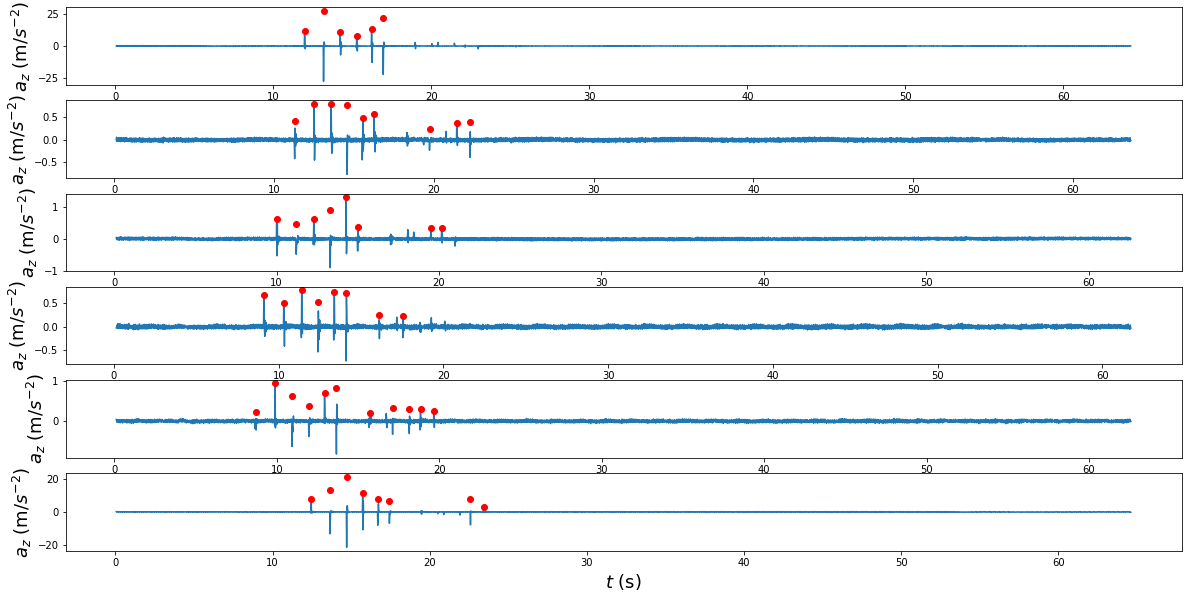

In [24]:
import scipy.signal as sig

phone = 8

nrow = len(phonelist)

fig1,axs = plt.subplots(nrows = nrow,figsize=(20,10))

npeak = 6

Tsync = np.zeros((nrow,npeak))
for i,phone in enumerate(phonelist):

    t = data[phone]['a']['d'][:,0]
    az = data[phone]['a']['d'][:,1]
    az = az - np.mean(az)
    peaksM = sig.find_peaks(np.abs(az),distance=30)[0]
    peaksm = sig.find_peaks(-az,distance=30)[0]

    if i==4:
        T = np.max(az)/8
    else:
        T = np.max(az)/4
    
    indM = np.abs(abs(az[peaksM])>T)
    indm = np.abs(abs(az[peaksm])>T)
    peaksM = peaksM[indM]
    peaksm = peaksm[indm]

    #print(peaksM)
    #plt.xlim(10,25)
    axs[i].plot(t,az)
    #axs[i].plot(t[peaksM],az[peaksM],'r^')
    #axs[i].plot(t[peaksm],az[peaksm],'rv')
    
    peaks = peaksM
    axs[i].plot(t[peaks],np.abs(az[peaks]),'ro')
    
    #ax.plot(t[peaks][:-1],np.diff(t[peaks]),'o')
    figs = graphes.legende('','$a_z$ (m/$s^{-2}$)','',ax=axs[i])

    Tsync[i,:] = t[peaks][:6]
    
figs = graphes.legende('$t$ (s)','$a_z$ (m/$s^{-2}$)','')
#graphes.save_figs(figs,savedir=savefolder,prefix = 'sync_',overwrite=True)

dict_keys(['device', 'time', 'a', 'g', 'l', 'm'])

dict_keys([11, 12, 13, 16, 21, 8])
-1.4052777290344238 0.015588497869597838
0.0 0.0
-58110579.21358919 0.01549052749681714
-13.872527837753296 0.011731164512721253
-58175118.69446468 0.023694335654892356
10.574829339981079 0.014097333051459994


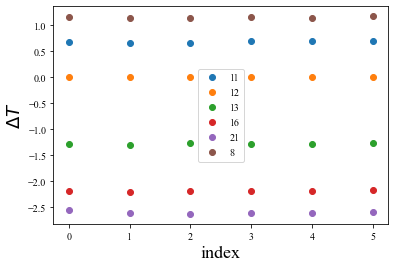

In [38]:
phoneref = 12
indexref = 1
print(phonelist)

tref = data[phoneref]['time']['system_START']
tref = get_time(tref)[0]

timeref = {}

for i,phone in enumerate(phonelist):
    timeref[phone]={}
    t0 = data[phone]['time']['system_START']
    t0 = get_time(t0)[0]
    #print(t0-tref)
    
    plt.plot(Tsync[i,:]-Tsync[indexref],'o')
    Dt = np.mean(Tsync[i,:]-Tsync[indexref])+t0-tref
    Dterr = np.std(Tsync[i,:]-Tsync[indexref])
    print(Dt,Dterr)
    timeref[phone]['Dt']=Dt
    timeref[phone]['Dterr']=Dterr
    #timeref[phone]['Dtabs']=Dt+t0-tref
    
#    print(Dt)

#    plt.plot(np.diff(Tsync[i,:]),'o')
plt.legend(phonelist)
figs = graphes.legende('index','$\Delta T$','')
#graphes.save_figs(figs,savedir=savefolder,overwrite=True)

In [67]:
print(timeref)

import icewave.tools.rw_data as rw_data

print(date)
filename = savefolder +f"timeref_{date}.txt"
rw_data.writedict_csv(filename,timeref)

{11: {'Dt': -1.4052777290344238, 'Dterr': 0.015588497869597838}, 12: {'Dt': 0.0, 'Dterr': 0.0}, 13: {'Dt': -58110579.21358919, 'Dterr': 0.01549052749681714}, 16: {'Dt': -13.872527837753296, 'Dterr': 0.011731164512721253}, 21: {'Dt': -58175118.69446468, 'Dterr': 0.023694335654892356}, 8: {'Dt': 10.574829339981079, 'Dterr': 0.014097333051459994}}
0211
[11, 12, 13, 16, 21, 8]


In [59]:
import icewave.tools.h5py_ice as h5

print(savefolder)
filename = savefolder +'timeref'
h5.write(filename,timeref)


/media/turbots/BicWin2024/Share/Data/0211/Telephones/Resultats/


OSError: Unable to synchronously create file (unable to truncate a file which is already open)

In [56]:
hf1 = h5.read(filename)
for phone in hf1:
    for key in hf1[phone].attrs.keys():
        print(hf1[phone].attrs[key])

11
12
13
16
21
8
-1.4052777290344238
0.015588497869597838
0.0
0.0
-58110579.21358919
0.01549052749681714
-13.872527837753296
0.011731164512721253
-58175118.69446468
0.023694335654892356
10.574829339981079
0.014097333051459994


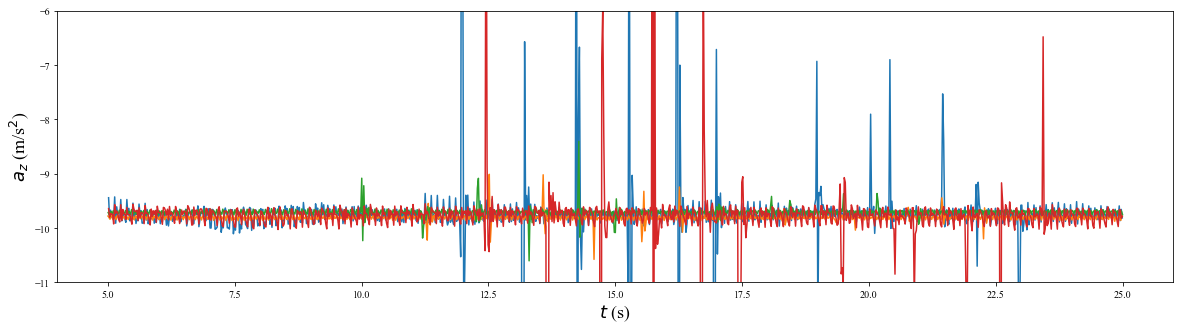

In [49]:
phonelist = data.keys()

fig,ax = plt.subplots(figsize=(20,5))

phonelist = [11,12,13,8]
for i,phone in enumerate(phonelist):
    t = data[phone]['a'][:,0]
    az = data[phone]['a'][:,1]

    ti = 5#1300
    tf = 25#2700
    T = tf-ti

    indices = np.logical_and(t>=ti,t<tf)
    t = t[indices]
    az = az[indices]
    ax.plot(t,az)
    #plt.xlim(0,T/20)
    plt.ylim(-11,-6)
    #graphes.save_figs(figs,savedir=savefolder,prefix=f"phone{phone}_",overwrite=True)

    #nt = len(t)     
figs = graphes.legende('$t$ (s)','$a_z$ (m/s$^2$)','')

In [17]:
nphone = len(data.keys())

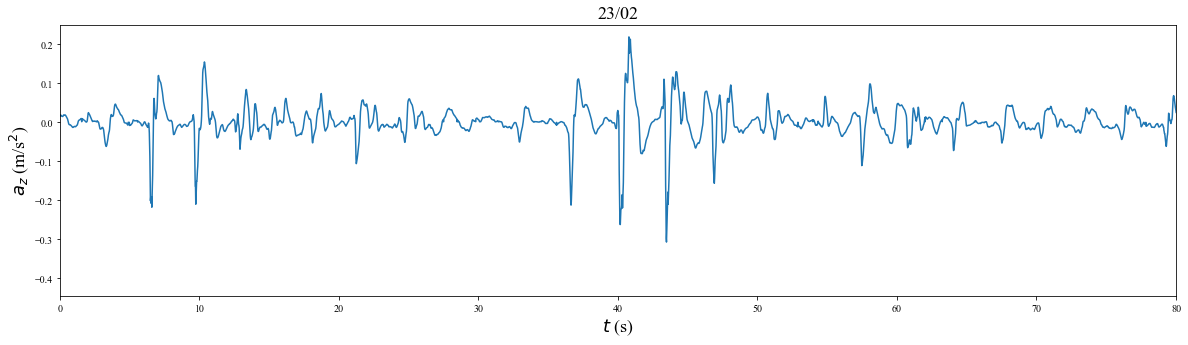

In [105]:
phone = 0
fig,axs = plt.subplots(figsize=(20,5))

t = data[phone]['g'][:,0]
az = data[phone]['g'][:,1]

ti = 1150#1300
tf = 2750#2700
T = tf-ti

indices = np.logical_and(t>=ti,t<tf)
t = t[indices]-ti
az = az[indices]

plt.plot(t,az)
plt.xlim(0,T/20)
#plt.ylim(9.2,10.5)
figs = graphes.legende('$t$ (s)','$a_z$ (m/s$^2$)','23/02')
#graphes.save_figs(figs,savedir=savefolder,prefix=f"phone{phone}_",overwrite=True)

nt = len(t)

In [69]:
data[phone]['l']

array([  1.90757354,  48.32979833, -68.84980333,   3.09210957,
         1.20702362,  75.25      ,   9.69999981, 139.6999969 ])

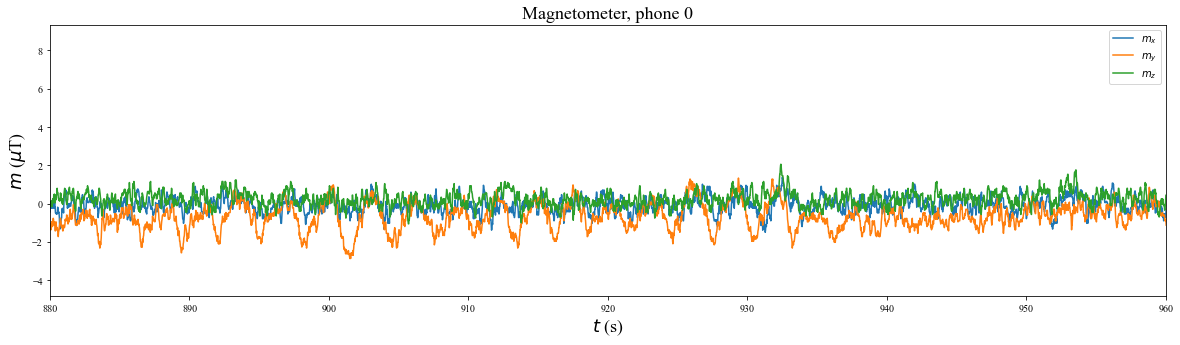

In [117]:
phone = 0
fig,axs = plt.subplots(figsize=(20,5))

t = data[phone]['m'][:,0]
mx = data[phone]['m'][:,1]
my = data[phone]['m'][:,2]
mz = data[phone]['m'][:,3]

ti = 1150#1300
tf = 2750#2700
T = tf-ti

indices = np.logical_and(t>=ti,t<tf)
t = t[indices]-ti
mx = mx[indices]
my = my[indices]
mz = mz[indices]

mx = mx - np.mean(mx)
my = my - np.mean(my)
mz = mz - np.mean(mz)

plt.plot(t,mx)
plt.plot(t,my)
plt.plot(t,mz)
plt.xlim(11*T/20,12*T/20)
#plt.ylim(9.2,10.5)
plt.legend(['$m_x$','$m_y$','$m_z$'])
figs = graphes.legende('$t$ (s)','$m$ ($\mu$T)',f'Magnetometer, phone {phone}',cplot=True)
graphes.save_figs(figs,savedir=savefolder,prefix=f"phone{phone}_",suffix='extract',overwrite=True)
nt = len(t)


In [89]:
data[phone]['l'][:,0][2000]


2000.467653

1600
1600
1600
1600
1600
1600
1600
1600
1600
1600


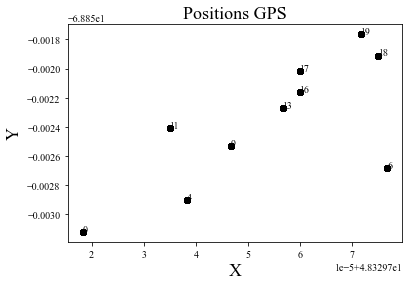

In [94]:
for phone in phonelist:
    t = data[phone]['l'][:,0]

    ti = 1150#1300
    tf = 2750#2700
    T = tf-ti

    print(np.sum(indices))
    indices = np.logical_and(t>=ti,t<tf)
    lat = data[phone]['l'][indices,1]
    lon = data[phone]['l'][indices,2]
    
    plt.plot(lat,lon,'ko')
    plt.text(lat[0],lon[0],phone)
    
figs = graphes.legende('X','Y','Positions GPS',cplot=True)
graphes.save_figs(figs,savedir=savefolder)

/tmp/ipykernel_398135/728455882.py:17: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(np.min(az),np.max(az))


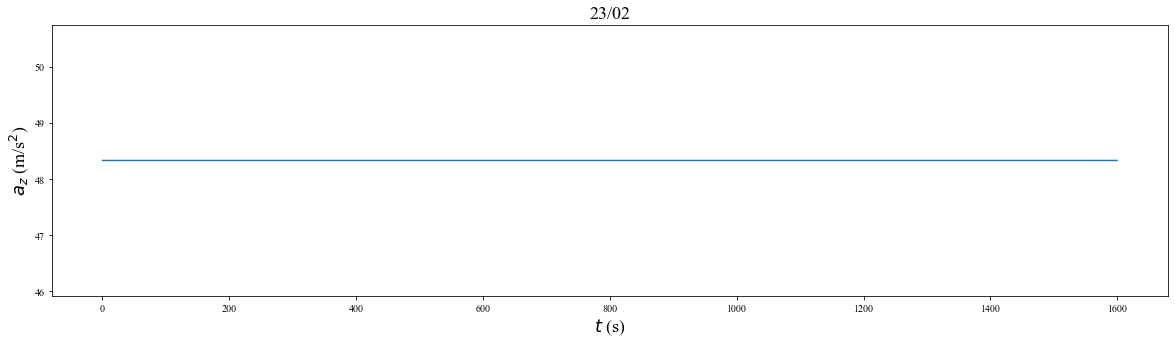

In [79]:
phone = 6
fig,axs = plt.subplots(figsize=(20,5))

t = data[phone]['l'][:,0]
az = data[phone]['l'][:,1]

ti = 1150#1300
tf = 2750#2700
T = tf-ti

indices = np.logical_and(t>=ti,t<tf)
t = t[indices]-ti
az = az[indices]

plt.plot(t,az)
#plt.xlim(0,T/20)
plt.ylim(np.min(az),np.max(az))
figs = graphes.legende('$t$ (s)','$a_z$ (m/s$^2$)','23/02')
#graphes.save_figs(figs,savedir=savefolder,prefix=f"phone{phone}_",overwrite=True)

nt = len(t)

In [21]:
for phone in phonelist:
    t = data[phone]['a'][:,0]
    print(1/np.mean(np.diff(t)))

50.142318123179884
50.28305653052361
50.61625927507217
50.40994388183541
50.254244958155944
50.1937308007057
50.55496234954864
50.58293510435094
50.66026186140081
50.90350753761466


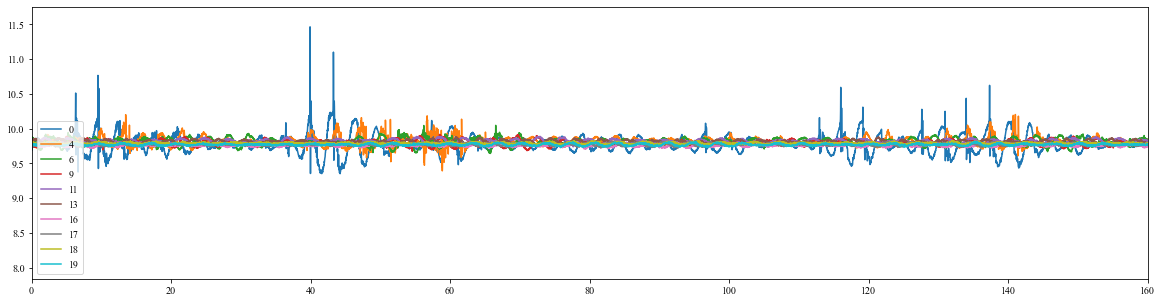

In [175]:

fig,axs = plt.subplots(figsize=(20,5))
phonelist = data.keys()
rms = []

m={}


    
for i,phone in enumerate(phonelist):
    m[phone] = {}
    
    t = data[phone]['a'][:,0]
    ax = data[phone]['a'][:,3]
    ay = data[phone]['a'][:,3]
    az = data[phone]['a'][:,3]
    
    ti = 1150#1300
    tf = 2750#2700
    T = tf-ti
    
    indices = np.logical_and(t>=ti,t<tf)
    t = t[indices]-ti
    ax = ax[indices]
    ay = ay[indices]
    az = az[indices]
    
    plt.plot(t,az)
    
    m[phone]['ta'] = t
    m[phone]['ax'] = ax
    m[phone]['ay'] = ay
    m[phone]['az'] = az
    
    
    rms.append(np.std(az))
    plt.xlim(0,T/10)
#    plt.axis([0,T/25,9,10.5])

plt.legend(phonelist)
#figs = graphes.legende('$t$ (s)','$a_z$ (m/s$^2$)','23/02')
#graphes.save_figs(figs,savedir=savefolder)

In [ ]:
np.log(np.exp(1))

36.137891426738854
figure already exists


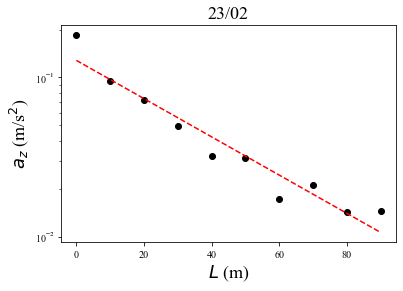

In [176]:
L = np.linspace(0,90,10)

plt.semilogy(L,rms,'ko')

p = np.polyfit(L,np.log(rms),1)
Ath = np.exp(np.polyval(p,L))
plt.plot(L,Ath,'r--')

print(-1/p[0])
figs = graphes.legende('$L$ (m)','$a_z$ (m/s$^2$)','23/02')
graphes.save_figs(figs,savedir=savefolder)

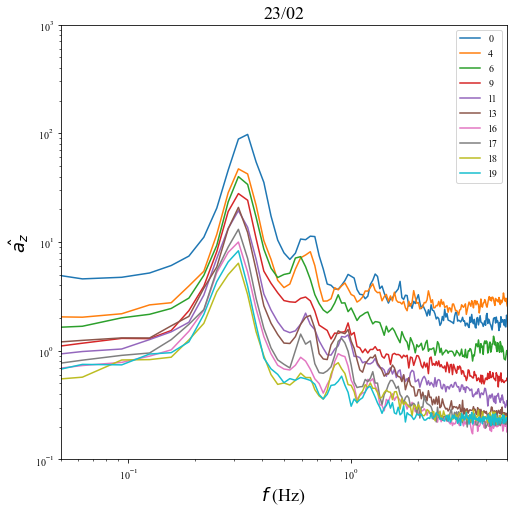

In [155]:
fig,axs = plt.subplots(figsize=(8,8))
phonelist = data.keys()
rms = []

    
nwin = 50
N = int(np.floor(80000/nwin))

TF_3 = np.zeros((nphone,nwin,int(N/2+1)))

for i,phone in enumerate(phonelist):
    t = m[phone]['ta']
    az = m[phone]['az']
        
    n = len(az)
    nfft = 2*16
    TF = np.fft.rfft(np.reshape(az[:N*nwin],(nwin,N)),axis=1)#,n=nfft)
    f = np.fft.rfftfreq(N, d=1/50)

    plt.plot(f,np.mean(np.abs(TF),axis=0))#,linestyle='-',marker='o')    
    plt.xscale('log')
    plt.yscale('log')
    plt.axis([0.05,5,0.1,10**3])
    
    TF_3[i,:,:] = np.abs(TF)
    

plt.legend(phonelist)
figs = graphes.legende('$f$ (Hz)','$\hat{a_z}$','23/02')
graphes.save_figs(figs,savedir=savefolder,overwrite=True)

In [154]:
TF_3.shape

(10, 50, 801)

figure already exists


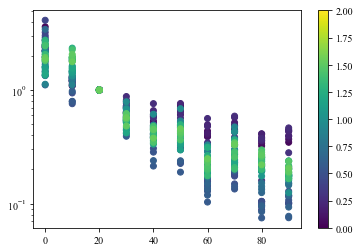

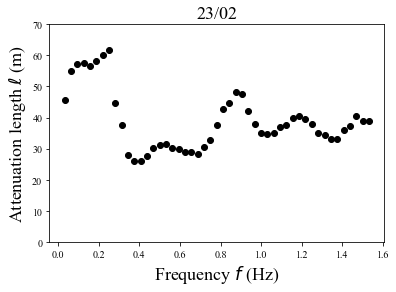

In [183]:
L = np.linspace(0,90,10)

frange = f[1:50]
kappa = []
for i in range(1,50):
    A_f = np.mean(TF_3[:,:,i],axis=1)
    color = f[i]*np.ones(nphone)
    plt.scatter(L,A_f/A_f[2],c=color,cmap='viridis',vmin=0,vmax=2)
    
    
    plt.yscale('log')
    
    p = np.polyfit(L,np.log(A_f),1)
#    Ath = np.exp(np.polyval(p,L))
#    plt.plot(L,Ath,'r--')
    kappa.append(-1/p[0])
    
    #print(f[i])
plt.colorbar()

plt.figure()

plt.plot(frange,kappa,'ko')
plt.ylim([0, 70])
figs = graphes.legende('Frequency $f$ (Hz)','Attenuation length $\ell$ (m)','23/02')
graphes.save_figs(figs,savedir=savefolder)

(0.1, 3.0)

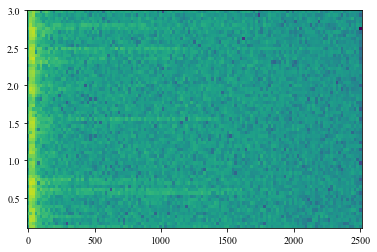

In [51]:
import scipy.signal as sig

phone = 9
[f,t,Sxx] = sig.spectrogram(m[phone]['az'],fs=5*10**3)

[F,T] = np.meshgrid(f,t)
plt.pcolormesh(F,T,np.log(np.transpose(Sxx)))
plt.ylim([0.1,3])

In [75]:
#load.extract_all(datafolder)

phonelist = load.get_pĥonelist(datafolder)
print(phonelist)
metalist = glob.glob(datafolder+'*/*/*.csv')
datalist = glob.glob(datafolder+'*/*.csv')
pprint(metalist)
pprint(datalist)

[0, 4, 6, 9, 11, 13, 16, 17, 18, 19]
['/media/turbots/BicWin2024/Share/Data/0223/Telephones/Phyphox_Buoys/0001_00_Accelero_Gyro_Magneto_GPS '
 '2024-02-23 19-38-12/meta/device.csv',
 '/media/turbots/BicWin2024/Share/Data/0223/Telephones/Phyphox_Buoys/0001_00_Accelero_Gyro_Magneto_GPS '
 '2024-02-23 19-38-12/meta/time.csv',
 '/media/turbots/BicWin2024/Share/Data/0223/Telephones/Phyphox_Buoys/0001_04_Accelero_Gyro_Magneto_GPS '
 '2024-02-23 19-36-09/meta/device.csv',
 '/media/turbots/BicWin2024/Share/Data/0223/Telephones/Phyphox_Buoys/0001_04_Accelero_Gyro_Magneto_GPS '
 '2024-02-23 19-36-09/meta/time.csv',
 '/media/turbots/BicWin2024/Share/Data/0223/Telephones/Phyphox_Buoys/0001_06_Accelero_Gyro_Magneto_GPS '
 '2024-02-23 19-40-09/meta/device.csv',
 '/media/turbots/BicWin2024/Share/Data/0223/Telephones/Phyphox_Buoys/0001_06_Accelero_Gyro_Magneto_GPS '
 '2024-02-23 19-40-09/meta/time.csv',
 '/media/turbots/BicWin2024/Share/Data/0223/Telephones/Phyphox_Buoys/0001_09_Accelero_Gyro_Magneto_

In [41]:
v

dict_keys(['/media/turbots/BicWin2024/Share/Data/0223/Telephones/Phyphox_Buoys/0001_16_Accelero_Gyro_Magneto_GPS 2024-02-23_20-18-31.zip', '/media/turbots/BicWin2024/Share/Data/0223/Telephones/Phyphox_Buoys/0001_17_Accelero_Gyro_Magneto_GPS 2024-02-23_20-20-40.zip', '/media/turbots/BicWin2024/Share/Data/0223/Telephones/Phyphox_Buoys/0001_18_Accelero_Gyro_Magneto_GPS 2022-04-22_07-37-52.zip', '/media/turbots/BicWin2024/Share/Data/0223/Telephones/Phyphox_Buoys/0001_19_Accelero_Gyro_Magneto_GPS 2024-02-23_20-22-00.zip'])

In [5]:
import zipfile
folder = '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703174855/'

filelist = glob.glob(folder+'*.zip')
print(filelist)

data = {}
for filename in filelist:
    with zipfile.ZipFile(filename,"r") as zip_ref:
        foldersave = filename.split('.')[0]
        zip_ref.extractall(foldersave)
    datafile = foldersave+'/Accelerometer.csv'
    d = np.loadtxt(datafile, delimiter=',',skiprows=1)
    data[filename] = d

['/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703174855/test_192_168_0_143.zip', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703174855/test_192_168_0_161.zip', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703174855/test_192_168_0_158.zip', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703174855/test_192_168_0_106.zip', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703174855/test_192_168_0_136.zip', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703174855/test_192_168_0_117.zip', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703174855/test_192_168_0_122.zip', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703174855/test_192_168_0_128.zip', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703174855/test_192_168_0_112.zip']


In [6]:
csv_timelist = glob.glob(folder+'*/*/time.csv')

data = {}
key = 'time'
data[key]={}
for filename in csv_timelist:
    #print(filename)
    rows = []
    num = int(filename.split('_')[-1].split('/')[0])-100
    #print(i,expnum)
    #print(num)
    k = num
    data['time'][k]={}
    with open(filename) as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            rows.append(row)
            #print(', '.join(row))
        data['time'][k]['raw']=rows
#filename = glob.glob(folder+'*.csv')[0]

In [7]:
phonelist = [phone for phone in data['time'].keys()]

In [8]:
for phone in phonelist:
    print(data['time'][phone]['raw'])

[['"event"', '"experiment time"', '"system time"', '"system time text"'], ['"START"', '0.000000000E0', '1703174852.949', '"2023-12-21 17:07:32.949 UTC+01:00"'], ['"PAUSE"', '1.818538486E2', '1703175034.803', '"2023-12-21 17:10:34.803 UTC+01:00"']]
[['"event"', '"experiment time"', '"system time"', '"system time text"'], ['"START"', '0.000000000E0', '1703174853.082', '"2023-12-21 17:07:33.082 UTC+01:00"'], ['"PAUSE"', '1.818080123E2', '1703175034.890', '"2023-12-21 17:10:34.890 UTC+01:00"']]
[['"event"', '"experiment time"', '"system time"', '"system time text"'], ['"START"', '0.000000000E0', '1703174856.802', '"2023-12-21 17:07:36.802 UTC+01:00"'], ['"PAUSE"', '1.816618665E2', '1703175038.464', '"2023-12-21 17:10:38.464 UTC+01:00"']]
[['"event"', '"experiment time"', '"system time"', '"system time text"'], ['"START"', '0.000000000E0', '1703174859.581', '"2023-12-21 17:07:39.581 UTC+01:00"'], ['"PAUSE"', '1.818268609E2', '1703175041.408', '"2023-12-21 17:10:41.408 UTC+01:00"']]
[['"even

In [9]:
key = 'xyz'
data[key]={}
keys = ['t','ax','ay','az']
csv_timelist = glob.glob(folder+'*/Accelerometer.csv')

print(csv_timelist)
for filename in csv_timelist:
    rows = []
    num = int(filename.split('_')[-1].split('/')[0])-100
    #print(num)
    data[key][num]={}
    with open(filename) as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for j,row in enumerate(spamreader):
            rows.append(row)
            #print(', '.join(row))
            for l,k in enumerate(keys):
                if j==0:
                    data[key][num][k]=[]
                else:
                    data[key][num][k].append(float(row[l]))

#filename = glob.glob(folder+'*.csv')[0]

['/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703174855/test_192_168_0_128/Accelerometer.csv', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703174855/test_192_168_0_117/Accelerometer.csv', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703174855/test_192_168_0_106/Accelerometer.csv', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703174855/test_192_168_0_158/Accelerometer.csv', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703174855/test_192_168_0_136/Accelerometer.csv', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703174855/test_192_168_0_143/Accelerometer.csv', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703174855/test_192_168_0_122/Accelerometer.csv', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703174855/test_192_168_0_161/Accelerometer.csv', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703174855/test_192_168_0_112/Accelerometer.csv']


In [10]:
for phone in phonelist:
    print(data['xyz'][phone]['t'][0])

0.033650093
0.04575253
0.034201043
0.017699299
0.032444971
0.048298067
0.042330837
0.017718732
0.034428005


In [11]:
key = 'xyz'
#data[key]={}
keys = ['tg','gx','gy','gz']
csv_timelist = glob.glob(folder+'*/Gyroscope.csv')

print(csv_timelist)
for filename in csv_timelist:
    rows = []
    num = int(filename.split('_')[-1].split('/')[0])-100
    print(num)
    #data[key][num]={}
    with open(filename) as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for j,row in enumerate(spamreader):
            rows.append(row)
            #print(', '.join(row))
            for l,k in enumerate(keys):
                if j==0:
                    data[key][num][k]=[]
                else:
                    data[key][num][k].append(float(row[l]))

#filename = glob.glob(folder+'*.csv')[0]

['/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703174855/test_192_168_0_128/Gyroscope.csv', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703174855/test_192_168_0_117/Gyroscope.csv', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703174855/test_192_168_0_106/Gyroscope.csv', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703174855/test_192_168_0_158/Gyroscope.csv', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703174855/test_192_168_0_136/Gyroscope.csv', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703174855/test_192_168_0_143/Gyroscope.csv', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703174855/test_192_168_0_122/Gyroscope.csv', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703174855/test_192_168_0_161/Gyroscope.csv', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703174855/test_192_168_0_112/Gyroscope.csv']
28
17
6
58
36
43
22
61
12


In [ ]:
phonelist.sort()
print(phonelist)

In [125]:
phonelist = list(data["xyz"].keys())
phonelist.sort()
#print(phonelist)
print(phonelist)

[6, 12, 17, 22, 28, 36, 43, 58, 61]


In [126]:
data['dt_phy']={}
for phone in phonelist:
    data['dt_phy'][phone] = float(data['time'][phone]['raw'][1][2])-float(data['time'][12]['raw'][1][2])
print(data['dt_phy'])

{6: -1.056999921798706, 12: 0.0, 17: -4.7769999504089355, 22: -2.50600004196167, 28: -4.9100000858306885, 36: 0.3900001049041748, 43: -0.818000078201294, 58: 1.7220001220703125, 61: 1.4060001373291016}


In [127]:
data.keys()

dict_keys(['time', 'xyz', 'dt_phy', 'dt_abs', 'tcalib'])

In [128]:
data['xyz'][22].keys()

dict_keys(['t', 'ax', 'ay', 'az', 'tg', 'gx', 'gy', 'gz'])

In [129]:
timetable = glob.glob(folder+'*.txt')[0]

data['dt_abs']={}
with open(timetable) as txtfile:
    table = txtfile.readlines()
    
for tab in table:
    tab = tab[:-2]
    num,time = tab.split('\t')
    num = int(num)
    time = float(time)
    
    if num in phonelist:
        data['dt_abs'][num]=time
        print(num,time)

28 -5.27363967895507
58 0.0425996780395507
17 -4.828015804290771
22 -2.438829898834228
43 -1.514500141143798
61 -0.496429681777954
12 0.0697245597839355
6 -1.13158106803894
36 0.01232194900512695


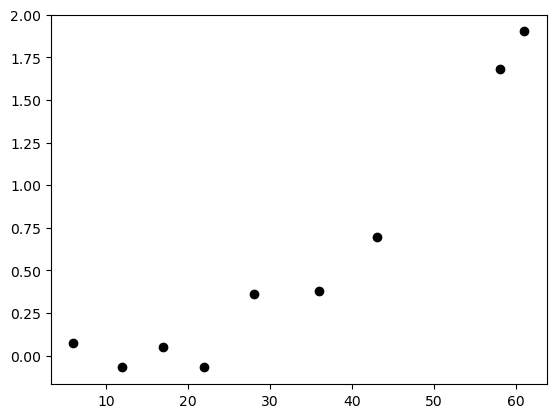

In [130]:
for phone in phonelist:
    dt = -data['dt_abs'][phone]+data['dt_phy'][phone]
    plt.plot(phone,dt,'ko')

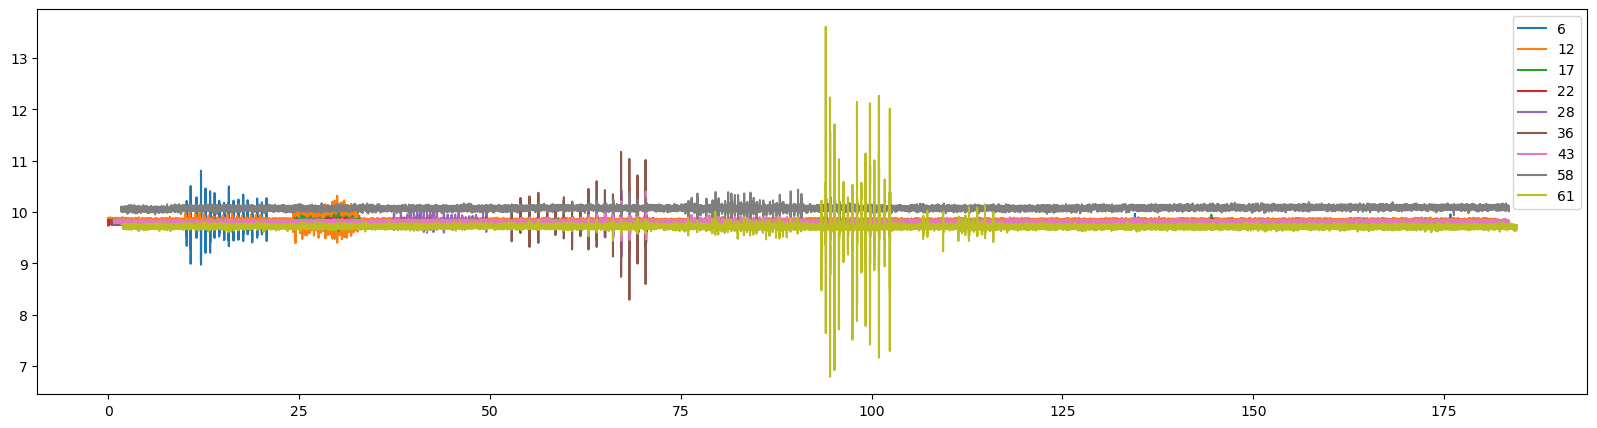

In [131]:
fig,ax = plt.subplots(figsize=(20,5))

for phone in phonelist:
    dt = -data['dt_abs'][phone]+data['dt_phy'][phone]
    t = np.asarray(data["xyz"][phone]['t'])
    ax.plot(t+dt,data["xyz"][phone]['az'],'')

    g = 0
    #plt.axis([56,58,9.5-g,10.5-g])
    #plt.axis([61.5,62.5,9.5,10.5])
    
plt.legend(phonelist)

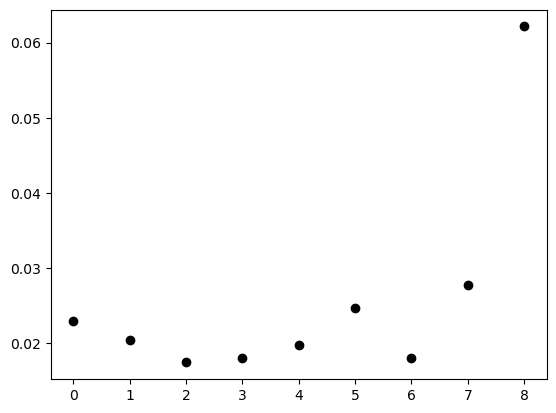

In [132]:
for j,phone in enumerate(phonelist):
    plt.plot(j,np.std(data["xyz"][phone]['az']),'ko')

In [133]:
data['dt_phy']

{6: -1.056999921798706,
 12: 0.0,
 17: -4.7769999504089355,
 22: -2.50600004196167,
 28: -4.9100000858306885,
 36: 0.3900001049041748,
 43: -0.818000078201294,
 58: 1.7220001220703125,
 61: 1.4060001373291016}

In [134]:
data['dt_abs']

{28: -5.27363967895507,
 58: 0.0425996780395507,
 17: -4.828015804290771,
 22: -2.438829898834228,
 43: -1.514500141143798,
 61: -0.496429681777954,
 12: 0.0697245597839355,
 6: -1.13158106803894,
 36: 0.01232194900512695}

0.07458114624023393
-0.0697245597839355
0.05101585388183505
-0.06717014312744185
0.36363959312438165
0.37767815589904785
0.696500062942504
1.6794004440307617
1.9024298191070557


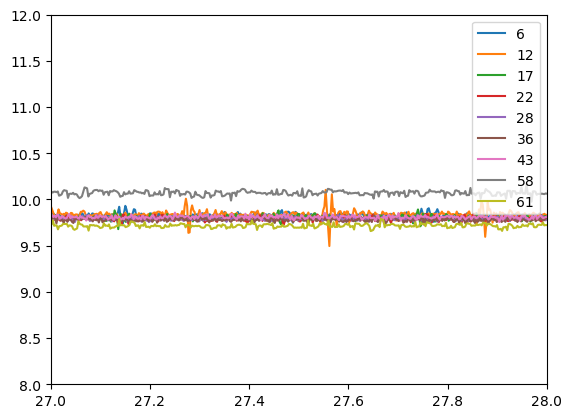

In [135]:
for phone in phonelist:
    dt = -data['dt_abs'][phone]+data['dt_phy'][phone]
    t = np.asarray(data["xyz"][phone]['t'])
    plt.plot(t+dt,data["xyz"][phone]['az'],'')

    print(dt)
    plt.axis([27,28,8,12])
plt.legend(phonelist)

In [136]:
data

{'time': {28: {'raw': [['"event"',
     '"experiment time"',
     '"system time"',
     '"system time text"'],
    ['"START"',
     '0.000000000E0',
     '1703174852.949',
     '"2023-12-21 17:07:32.949 UTC+01:00"'],
    ['"PAUSE"',
     '1.818538486E2',
     '1703175034.803',
     '"2023-12-21 17:10:34.803 UTC+01:00"']]},
  17: {'raw': [['"event"',
     '"experiment time"',
     '"system time"',
     '"system time text"'],
    ['"START"',
     '0.000000000E0',
     '1703174853.082',
     '"2023-12-21 17:07:33.082 UTC+01:00"'],
    ['"PAUSE"',
     '1.818080123E2',
     '1703175034.890',
     '"2023-12-21 17:10:34.890 UTC+01:00"']]},
  6: {'raw': [['"event"',
     '"experiment time"',
     '"system time"',
     '"system time text"'],
    ['"START"',
     '0.000000000E0',
     '1703174856.802',
     '"2023-12-21 17:07:36.802 UTC+01:00"'],
    ['"PAUSE"',
     '1.816618665E2',
     '1703175038.464',
     '"2023-12-21 17:10:38.464 UTC+01:00"']]},
  58: {'raw': [['"event"',
     '"experime

In [137]:
dt = 0.001

data['tcalib']={}
Tmin,Tmax = [],[]

f = {}
for phone in phonelist:
    dt = -data['dt_abs'][phone]+data['dt_phy'][phone]
    t = np.asarray(data["xyz"][phone]['t'])
    data['tcalib'][phone] = t+dt
    
    tcalib = data['tcalib'][phone]
    print(np.min(tcalib),np.max(tcalib))
    Tmin.append(np.min(tcalib))
    Tmax.append(np.max(tcalib))

tmin = np.max(Tmin)
tmax = np.min(Tmax)

print(tmin,tmax)


0.10878218924023393 181.73115974624022
-0.03529655478393551 181.52082524021606
0.09676838388183505 181.85635225388182
-0.024839306127441847 182.01083685687257
0.39728968612438165 182.21294399312438
0.41012312689904784 182.25229605589905
0.7447981299425039 183.4229324629425
1.6970997430307617 183.50190594403077
1.9201485511070557 184.54840811910705
1.9201485511070557 181.52082524021606


In [138]:

fx,fy,fz = {},{},{}
for phone in phonelist:
    fz[phone] = interp.interp1d(data['tcalib'][phone],data['xyz'][phone]['az'])
    fy[phone] = interp.interp1d(data['tcalib'][phone],data['xyz'][phone]['ay'])
    fx[phone] = interp.interp1d(data['tcalib'][phone],data['xyz'][phone]['ax'])

In [139]:

n = len(phonelist)

ti = np.arange(tmin,tmax,0.001)

print(len(ti))
N = len(ti)
Zx = np.zeros((n,N))
Zy = np.zeros((n,N))
Zz = np.zeros((n,N))

for j,phone in enumerate(phonelist):
    Zx[j,:] = fx[phone](ti)
    Zy[j,:] = fy[phone](ti)
    Zz[j,:] = fz[phone](ti)

    #fig,ax = plt.subplots(figsize=(15,5))
    #for num in tellist:
    #    ax.plot(ti,Z[i-1,num-1,:])
    #    graphes.legende('Time (s)','Acceleration m/s$^2$','Interpolated time')

179601


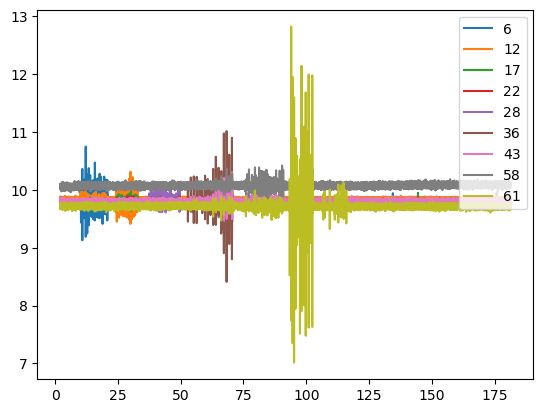

In [140]:
for j in range(n):
    plt.plot(ti,Zz[j,:])
    #plt.axis([108.6,108.9,9.5,10.5])    
plt.legend(phonelist)

In [141]:
Cz = np.zeros((n,N*2-1))
for i,key in enumerate(phonelist):
    print(i)    
    y1 = Zz[i,:]
    y1 = y1 - np.mean(y1)
    Cz[i,:] = sig.correlate(y1,y1,'full')
    
    
#plt.plot(C)   
#    print(C)


0
1
2
3
4
5
6
7
8


0
6 17
1
12 22
2
17 28
3
22 36
4
28 43
5
36 58
6
43 61


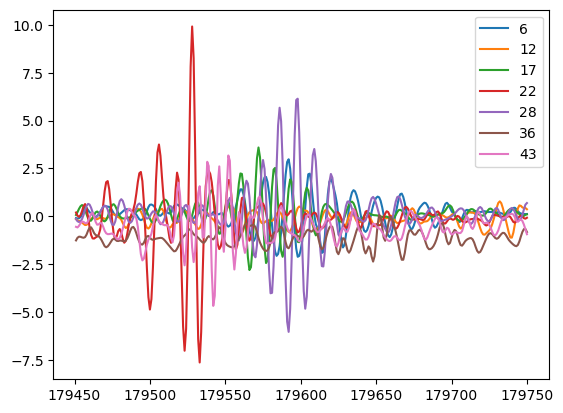

In [146]:
C = np.zeros((n-1,N*2-1))
d = 2
for i,key in enumerate(phonelist[:-d]):
    
    
    print(i)
    j = i+d
    y1 = Zz[i,:]
    y2 = Zz[j,:]
    y1 = y1 - np.mean(y1)
    y2 = y2 - np.mean(y2)

    x = np.arange(2*N-1)
    b = 150
    indices = range(N-b,N+b)
    C[i,:] = sig.correlate(y2,y1,'full')
    
    print(phonelist[i],phonelist[j])
    plt.plot(x[indices],C[i,indices])
    
plt.legend(phonelist[:-1])
#    print(C)

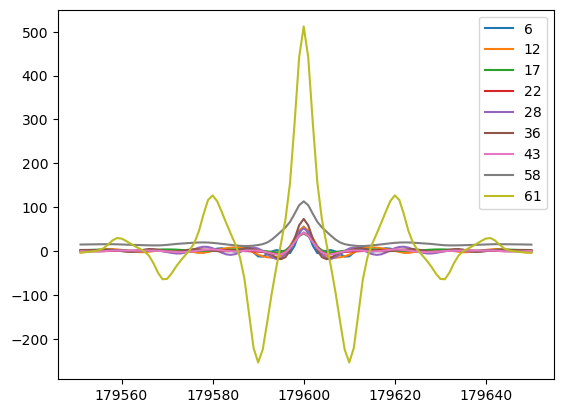

In [121]:
x = np.arange(2*N-1)
b = 50
indices = range(N-b,N+b)
for i,phone in enumerate(phonelist):
    plt.plot(x[indices],Cz[i,indices])
    
#    print(C)
plt.legend(phonelist)

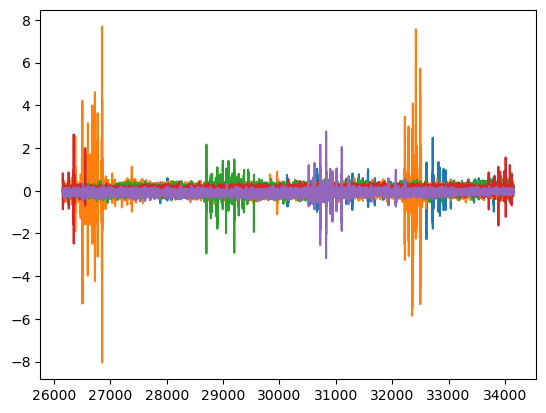

In [333]:
x = np.arange(2*N-1)
for i in range(5):
    b = 4000
    indices = range(N-b,N+b)
#    indices = range(2*N-1)
#    indices = range(N-b,N+b)
    #indices = range(28920,29000)
    
    plt.plot(x[indices],C[i,indices])

In [30]:
import scipy.signal as sig



In [16]:
#get start time, duration of recording
data = {}
data['time']={}

for i in range(1,6):


In [207]:
print(data['time'].keys())
print(data['time'][(1,10)]['raw'][2])

dict_keys([(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 29), (1, 31), (1, 33), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (2, 20), (2, 21), (2, 22), (2, 23), (2, 24), (2, 25), (2, 26), (2, 27), (2, 29), (2, 31), (2, 33), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (3, 20), (3, 21), (3, 22), (3, 23), (3, 24), (3, 25), (3, 26), (3, 27), (3, 29), (3, 31), (3, 33), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (4, 20), (4, 21), (4, 22), (4, 23), (4, 24), (4, 25), (4, 26), (4, 27), (4, 

In [208]:
starts = np.asarray([float(data['time'][k]['raw'][1][2]) for k in data['time'].keys()])
stops = np.asarray([float(data['time'][k]['raw'][2][2]) for k in data['time'].keys()])
print(stops-starts)

[39.95700002 39.68499994 39.68099999 39.30299997 39.18000007 37.96500015
 38.0309999  37.62100005 37.56500006 37.13800001 37.20799994 37.20600009
 37.22600007 36.59799981 36.13199997 36.49600005 36.53299999 36.64700007
 37.0710001  37.55800009 38.39099979 37.65899992 37.36000013 37.43299985
 37.41700006 36.85700011 36.38300014 36.41400003 36.204      42.81500006
 50.22900009 46.93300009 46.13400006 45.602      45.29099989 44.85399985
 44.05299997 44.24300003 43.27600002 43.68599987 43.30800009 43.32700014
 43.27999997 42.88499999 42.91100001 42.4920001  42.08300018 42.875
 42.05699992 42.06799984 42.65199995 42.60000014 42.72300005 42.33999991
 42.33200002 42.66300011 42.47399998 42.08299994 40.5539999  39.22900009
 37.60700011 37.65499997 37.32800007 36.8599999  36.91899991 37.38700008
 37.21000004 36.20799994 36.23199987 36.12600017 36.01399994 35.99000001
 35.52999997 34.68300009 34.62000012 34.76399994 34.12000012 33.67400002
 33.21099997 33.18799996 33.33200002 33.273      33.4079

1
2
3
4
5
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
29
31
33


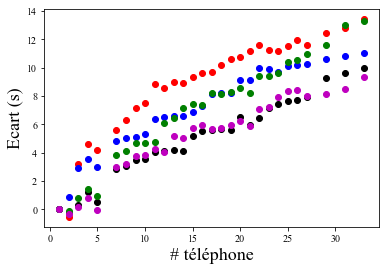

In [209]:
#Dt = starts-starts[0]
colors = ['k' ,'r' ,'b','g','m']
for (i,num) in data['time'].keys():
    k = (i,num)
    if i==1:
        print(num)
    data['time'][k]['dt']= float(data['time'][k]['raw'][1][2])-float(data['time'][(i,1)]['raw'][1][2])
    #print(num,Dt[num-1])
    plt.plot(num,data['time'][k]['dt'],marker='o',color=colors[i-1])
#plt.plot(starts-starts[0])

figs = graphes.legende('# téléphone','Ecart (s)','')
#graphes.save_figs(figs,savedir=savefolder)

In [210]:
# look at correlation along z
#get start time, duration of recording
key = 'xyz'
data[key]={}
keys = ['t','ax','ay','az']

for i in range(1,6):
    folder = '021123/'+str(i)#/media/turbots/DATA/thiou/labshared2/Windveil/NedFacades/recaps/'
    csv_timelist = glob.glob(folder+'/*/Raw data.csv')

    for filename in csv_timelist:
        rows = []
        num = int(filename.split('_')[-1].split('/')[0])-100
        #print(num)
        data[key][(i,num)]={}
        with open(filename) as csvfile:
            spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
            for j,row in enumerate(spamreader):
                rows.append(row)
                #print(', '.join(row))
                for l,k in enumerate(keys):
                    if j==0:
                        data[key][(i,num)][k]=[]
                    else:
                        data[key][(i,num)][k].append(float(row[l]))

#filename = glob.glob(folder+'*.csv')[0]

In [211]:
data['xyz'][(1,1)].keys()

dict_keys(['t', 'ax', 'ay', 'az'])

figure already exists


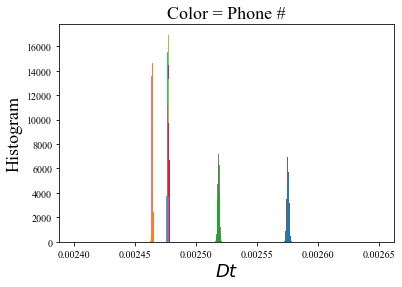

In [212]:
for (i,num) in data[key].keys():
    if num>5 and num<11:
        fig = plt.hist(np.diff(data[key][(i,num)]['t']),np.linspace(0.0024,0.00265,300))
figs = graphes.legende('$Dt$','Histogram','Color = Phone #')
graphes.save_figs(figs,savedir=savefolder)

figure already exists


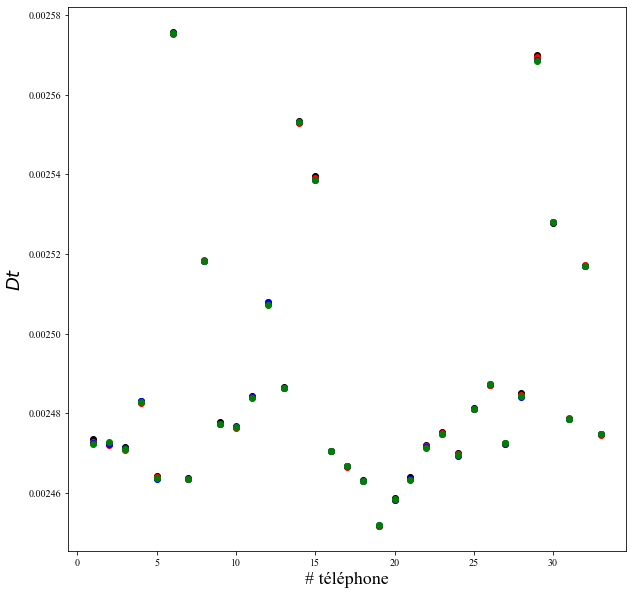

In [213]:
tellist = range(1,34)
fig,ax = plt.subplots(figsize=(10,10))

for i in range(1,5):

    Ft,Ft_std = [],[]
    for num in tellist:
        ft = np.mean(np.diff(data[key][(i,num)]['t']))
        ft_std = np.std(np.diff(data[key][(i,num)]['t']))
        Ft.append(ft)
        Ft_std.append(ft_std)

    plt.errorbar(tellist,Ft,np.asarray(Ft_std)/20,marker='o',color=colors[i-1],ls=' ')
    figs = graphes.legende('# téléphone','$Dt$','')
graphes.save_figs(figs,savedir=savefolder,prefix='Time_Synchronisation')

figure already exists


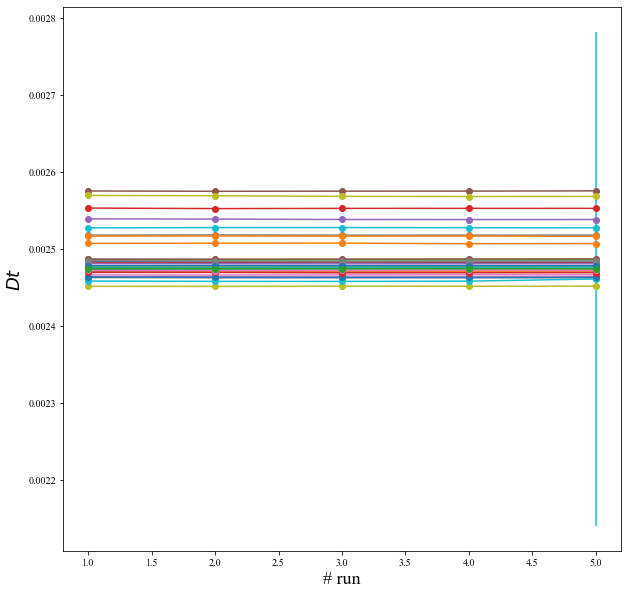

In [214]:
tellist = np.arange(1,34)
fig,ax = plt.subplots(figsize=(10,10))

for num in tellist:
    Ft,Ft_std = [],[]
    for i in range(1,6):
        ft = np.mean(np.diff(data[key][(i,num)]['t']))
        ft_std = np.std(np.diff(data[key][(i,num)]['t']))
        Ft.append(ft)
        Ft_std.append(ft_std)

    plt.errorbar(range(1,6),Ft,np.asarray(Ft_std),marker='o',ls='-')
    figs = graphes.legende('# run','$Dt$','')
graphes.save_figs(figs,savedir=savefolder)

In [215]:
(np.max(Ft)-np.min(Ft))/np.mean(Ft)

9.171829469609643e-05

In [218]:
#type(data[key][k]['t'])

(1, 6)
(1, 28)
(1, 30)
(1, 32)
(2, 6)
(2, 28)
(2, 30)
(2, 32)
(3, 6)
(3, 28)
(3, 30)
(3, 32)
(4, 6)
(4, 28)
(4, 30)
(4, 32)
(5, 6)
(5, 28)
(5, 30)
(5, 32)


In [228]:
len(tellist)

29

In [226]:
ti = {}
N = {}

for i in range(1,6):
    minT = []
    maxT = []
    for num in tellist:  
        k = (i,num)
        if num<250:
            t = np.asarray(data[key][k]['t'])+data['time'][k]['dt']
            minT.append(t[0])
            maxT.append(t[-1])

    mint = np.max(minT)
    maxt = np.min(maxT)

    print(maxt-mint)
    ti[i] = np.arange(mint,maxt,dt/10)
    N[i] = len(ti[i])
    print(N)

29.40673424096167
{1: 118825}
29.363251604127804
{1: 118825, 2: 118649}
29.019385707645384
{1: 118825, 2: 118649, 3: 117260}
29.655880196645384
{1: 118825, 2: 118649, 3: 117260, 4: 119832}
29.47628080835144
{1: 118825, 2: 118649, 3: 117260, 4: 119832, 5: 119106}


In [231]:
Z = {}
n = 33#len(tellist)

for i in range(1,6):
    Z[i] = np.zeros((n,N[i]))

    for j,num in enumerate(tellist):
        Z[i][num-1,:] = f[(i,num)](ti[i])
        Z[i][num-1,:] = Z[i][num-1,:] - np.mean(Z[i][num-1,:])

    #fig,ax = plt.subplots(figsize=(15,5))
    #for num in tellist:
    #    ax.plot(ti,Z[i-1,num-1,:])
    #    graphes.legende('Time (s)','Acceleration m/s$^2$','Interpolated time')

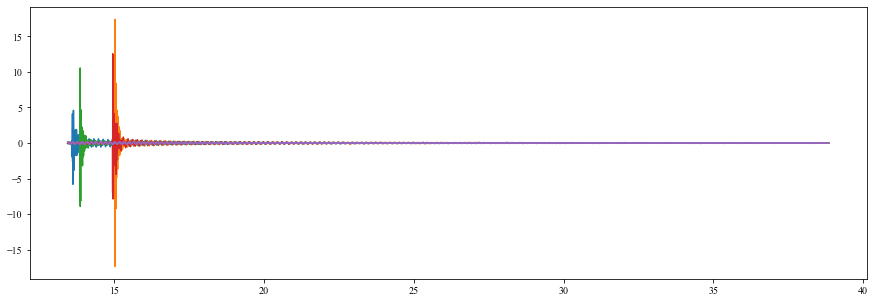

In [171]:
num=1
fig,ax = plt.subplots(figsize=(15,5))

for i in range(5):
    ax.plot(ti,Z[i,num-1,:])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


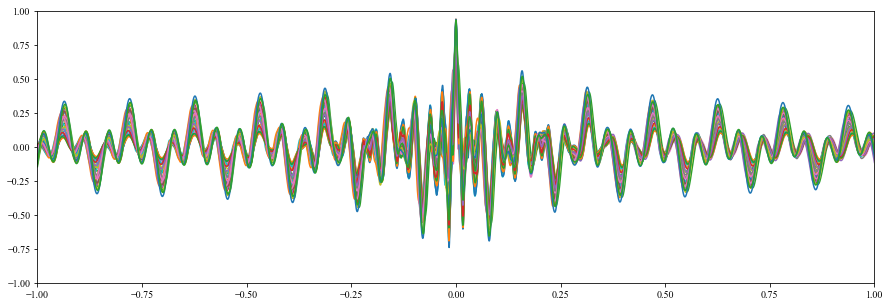

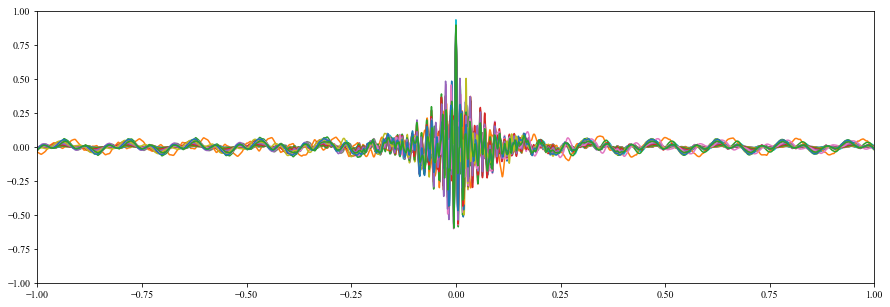

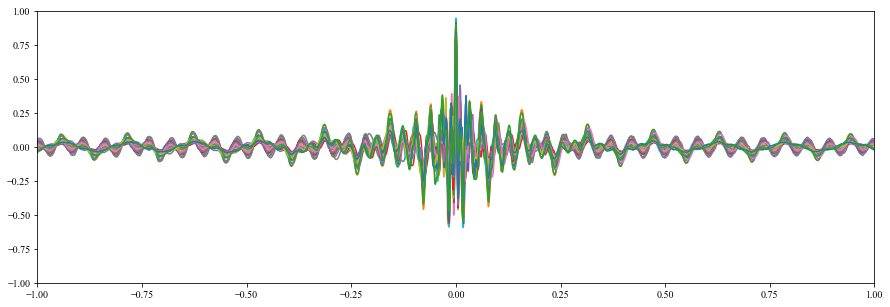

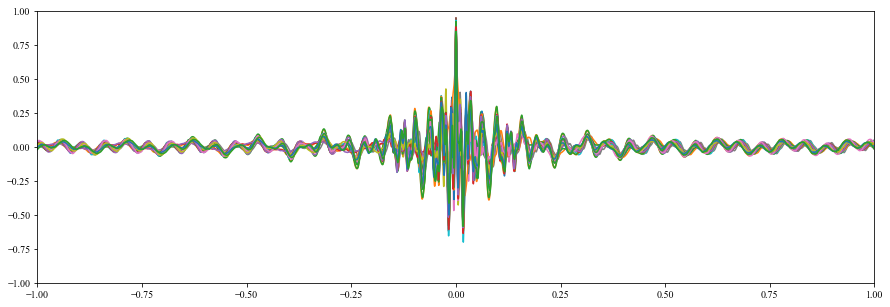

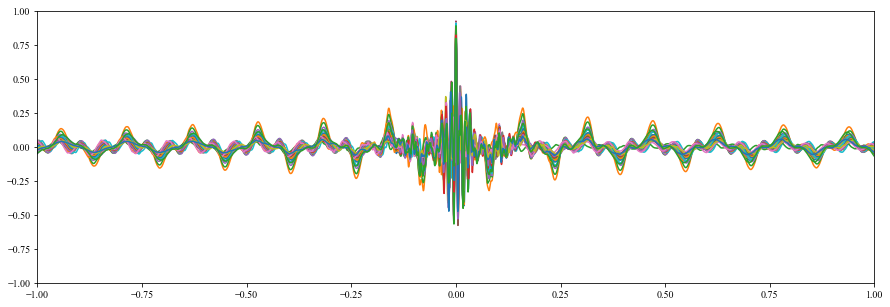

In [235]:
import scipy.signal as sig
tellist = np.arange(1,34)

j=2
Dt2 = np.zeros((5,n))
for i in range(1,6):
    fig,ax = plt.subplots(figsize=(15,5))

    for num in tellist:
        nump = np.mod(num+j-1,n)+1
        #print(num,nump)
        #numm = np.mod(num+j-3,n)+1

        #print(num,num2)

        Cp = np.asarray(sig.correlate(Z[i][num-1,:],Z[i][nump-1,:],mode='same'))
        Norm = np.sqrt(np.sum(Z[i][num-1,:]**2)*np.sum(Z[i][nump-1,:]**2))
        Cp = Cp/Norm

        lag = ti[i]-np.mean(ti[i])
        k = np.argmax(Cp)
        Dt2[i-1,num-1] = lag[k]
#        Dtm[num-1] = lag[k]

        ax.plot(lag-Dt2[i-1,num-1],Cp)
    plt.axis([-1,1,-1,1])

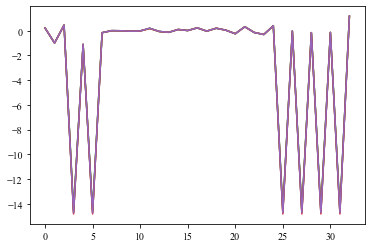

In [236]:
for i in range(1,6):
    plt.plot(Dt2[i-1,:])

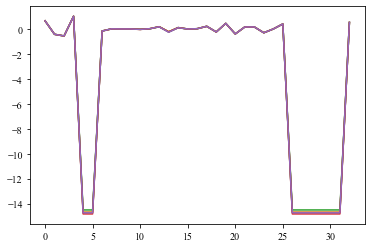

(0.0, 5.0, -20.0, 20.0)

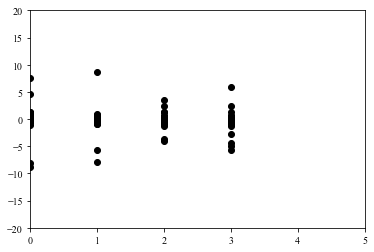

In [205]:
plt.plot(np.diff(Dt2*1000,axis=0),'ko')
plt.axis([0,5,-20,20])

(-1.0, 1.0, -1.0, 1.0)

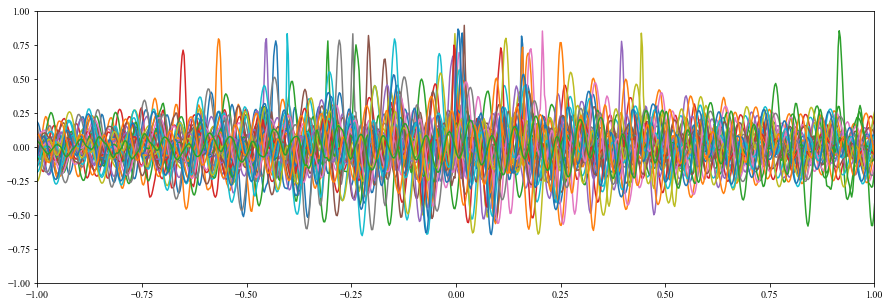

In [128]:
import scipy.signal as sig

fig,ax = plt.subplots(figsize=(15,5))

j=2
n = len(tellist)
#Dt2 = []
for num in tellist:
    num2 = np.mod(num+j-1,n)+1
    #print(num,num2)
    
    C = np.asarray(sig.correlate(Z[num-1,:],Z[num2-1,:],mode='same'))
    Norm = np.sqrt(np.sum(Z[num-1,:]**2)*np.sum(Z[num2-1,:]**2))
    lag = ti-np.mean(ti)
    k = np.argmax(C)
    #Dt2.append(lag[k])
    ax.plot(lag-Dt2[num-1],C/Norm)
    
plt.axis([-1,1,-1,1])

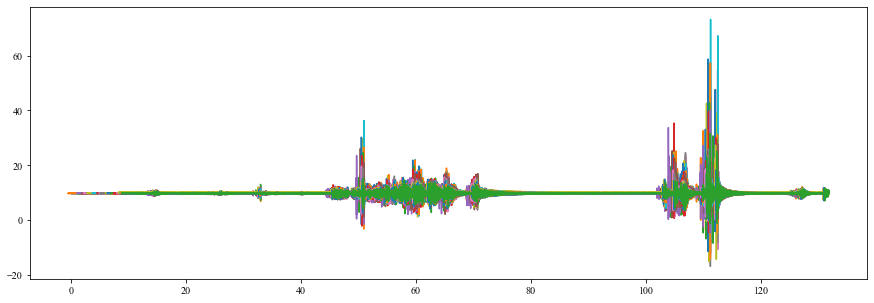

In [18]:
fig,ax = plt.subplots(figsize=(15,5))
C = np.zeros()
for i in range(1,34):
    for j in range(1,34):
        C[i,j] = 
        
    ax.plot(data[key][num]['t']+data['time'][num]['dt'],data[key][num]['az'])